In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [293]:
data=pd.read_csv("boston.csv")

In [294]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [295]:
data.shape

(506, 14)

In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [297]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [298]:
data.isnull().sum()*100/data.shape[0]

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

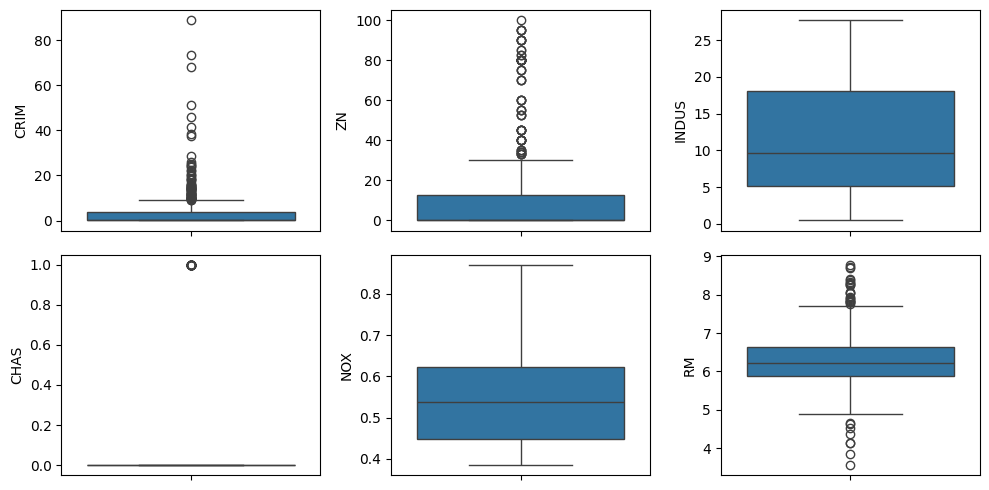

In [299]:
fig,axs=plt.subplots(2,3,figsize=(10,5))
plt1=sns.boxplot(data['CRIM'],ax=axs[0,0])
plt2=sns.boxplot(data['ZN'],ax=axs[0,1])
plt3=sns.boxplot(data['INDUS'],ax=axs[0,2])
plt1=sns.boxplot(data['CHAS'],ax=axs[1,0])
plt2=sns.boxplot(data['NOX'],ax=axs[1,1])
plt1=sns.boxplot(data['RM'],ax=axs[1,2])
plt.tight_layout()

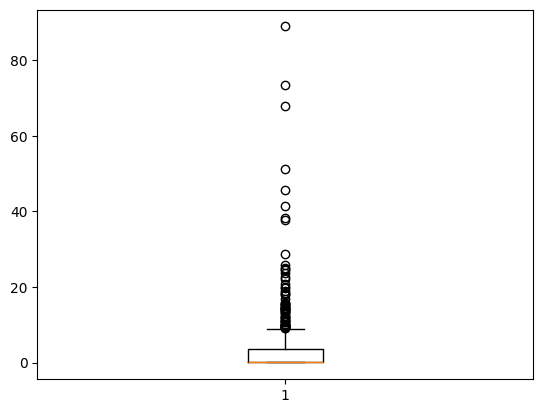

In [300]:
plt.boxplot(data.CRIM)
Q1=data.CRIM.quantile(0.25)
Q3=data.CRIM.quantile(0.75)
IQR=Q3+Q1
data=data[(data.CRIM>=Q1-1.5*IQR)&(data.CRIM<=Q3+1.5*IQR)]

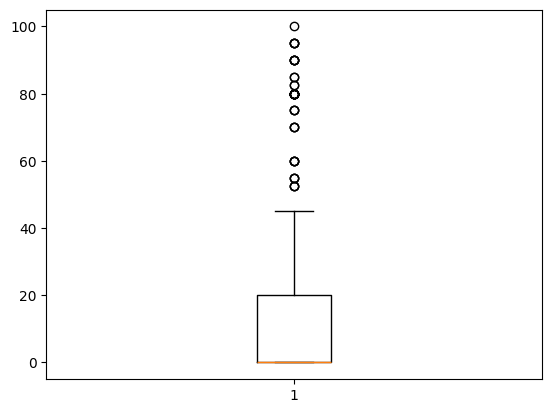

In [301]:
plt.boxplot(data.ZN)
Q1=data.ZN.quantile(0.25)
Q3=data.ZN.quantile(0.75)
IQR=Q3+Q1
data=data[(data.ZN>=Q1-1.5*IQR)&(data.ZN<=Q3+1.5*IQR)]

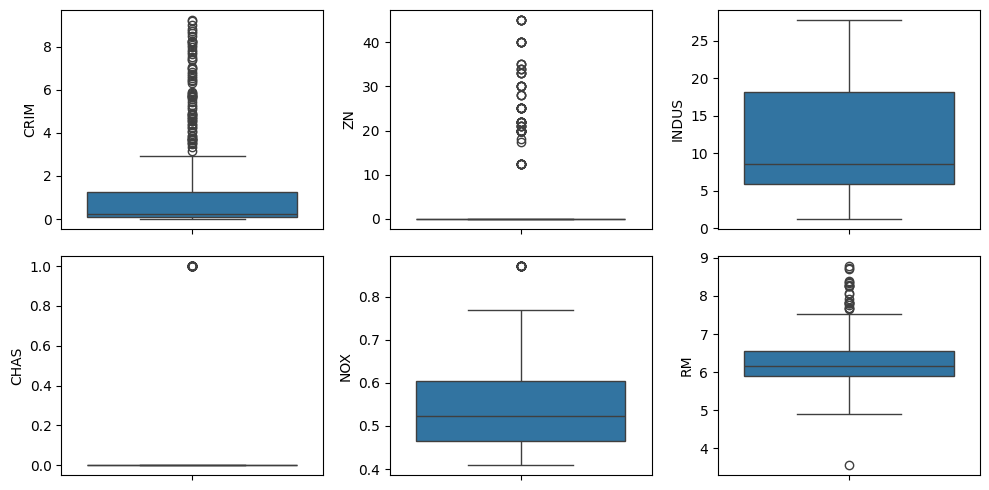

In [302]:
data=data.reset_index()
fig,axs=plt.subplots(2,3,figsize=(10,5))
plt1=sns.boxplot(data['CRIM'],ax=axs[0,0])
plt2=sns.boxplot(data['ZN'],ax=axs[0,1])
plt3=sns.boxplot(data['INDUS'],ax=axs[0,2])
plt1=sns.boxplot(data['CHAS'],ax=axs[1,0])
plt2=sns.boxplot(data['NOX'],ax=axs[1,1])
plt1=sns.boxplot(data['RM'],ax=axs[1,2])
plt.tight_layout()

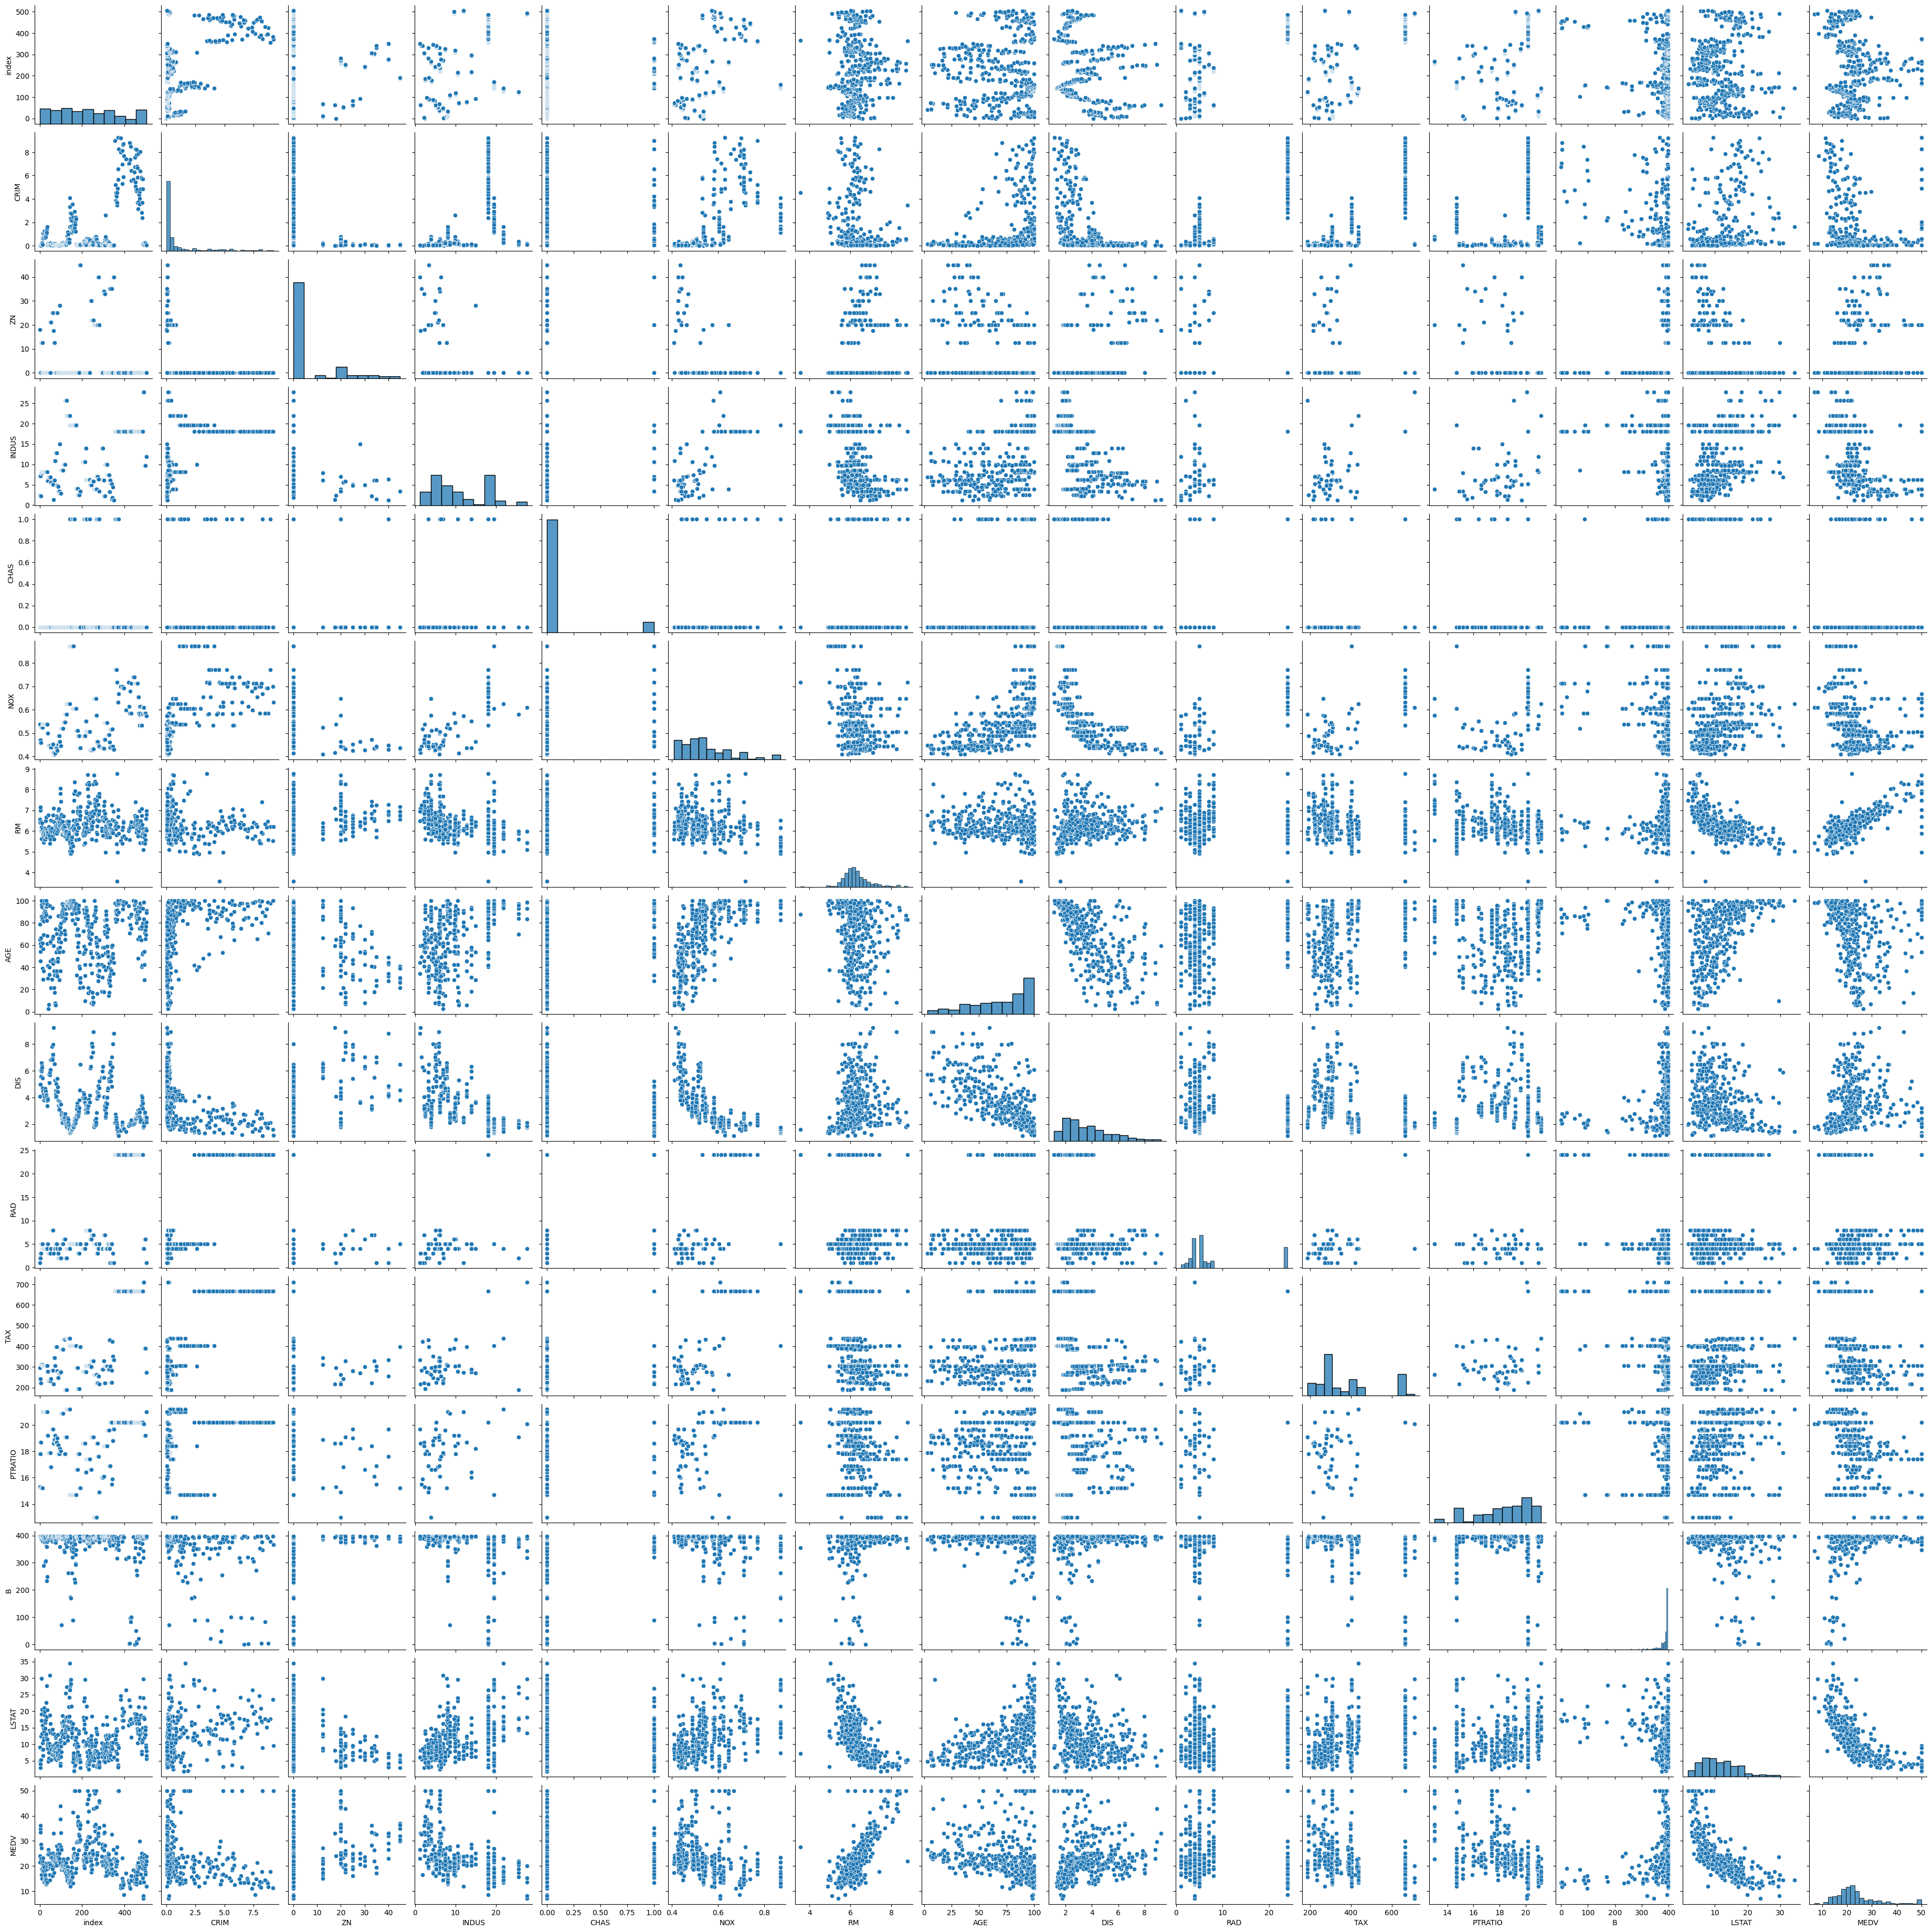

In [303]:
sns.pairplot(data)
plt.show()

In [304]:
varlist=['AGE','DIS','RAD','TAX','PTRATIO','B']
def binary_map(x):
    return x.map({'yes':1,"no":0})
data[varlist]=data[varlist].apply(binary_map)

In [305]:
data.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,NaN,NaN,NaN,NaN,NaN,NaN,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,NaN,NaN,NaN,NaN,NaN,NaN,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,NaN,NaN,NaN,NaN,NaN,NaN,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,NaN,NaN,NaN,NaN,NaN,NaN,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,NaN,NaN,NaN,NaN,NaN,NaN,5.33,36.2


In [306]:
status=pd.get_dummies(data['AGE'])

In [307]:
status.head()

""
0
1
2
3
4


In [308]:
status=pd.get_dummies(data['AGE'],drop_first=True)

In [309]:
data=pd.concat([data,status],axis=1)

In [310]:
data.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,NaN,NaN,NaN,NaN,NaN,NaN,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,NaN,NaN,NaN,NaN,NaN,NaN,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,NaN,NaN,NaN,NaN,NaN,NaN,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,NaN,NaN,NaN,NaN,NaN,NaN,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,NaN,NaN,NaN,NaN,NaN,NaN,5.33,36.2


In [311]:
data.drop(['AGE'],axis=1,inplace=True)

In [312]:
data.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,NaN,NaN,NaN,NaN,NaN,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,NaN,NaN,NaN,NaN,NaN,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,NaN,NaN,NaN,NaN,NaN,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,NaN,NaN,NaN,NaN,NaN,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,NaN,NaN,NaN,NaN,NaN,5.33,36.2


In [313]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

In [314]:
from sklearn.preprocessing import MinMaxScaler

In [315]:
scaler=MinMaxScaler()

In [316]:
num_vars=['ZN','INDUS','CHAS','NOX','RM','DIS']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

C:\Users\Pvenk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_array_api.py:472: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\Pvenk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\_array_api.py:489: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [317]:
df_train.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
47,49,0.21977,0.0,0.213666,0.0,0.084416,0.423972,NaN,NaN,NaN,NaN,NaN,16.20,19.4
278,314,0.36920,0.0,0.326538,0.0,0.292208,0.624429,NaN,NaN,NaN,NaN,NaN,9.28,23.8
216,236,0.52058,0.0,0.186863,1.0,0.212121,0.637723,NaN,NaN,NaN,NaN,NaN,9.54,25.1
396,505,0.04741,0.0,0.403171,0.0,0.354978,0.512879,NaN,NaN,NaN,NaN,NaN,7.88,11.9
120,128,0.32543,0.0,0.779162,0.0,0.465368,0.596178,NaN,NaN,NaN,NaN,NaN,15.39,18.0


In [318]:
df_train.describe()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,0.0,0.0,0.0,0.0,277.000000,277.000000
mean,229.649819,1.348232,0.132611,0.363146,0.086643,0.305888,0.562106,NaN,NaN,NaN,NaN,NaN,11.852708,22.912635
std,145.777563,2.301345,0.263710,0.247162,0.281820,0.239858,0.125497,NaN,NaN,NaN,NaN,NaN,5.816132,7.948796
min,0.000000,0.006320,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.730000,8.100000
25%,108.000000,0.092520,0.000000,0.174028,0.000000,0.119048,0.490029,NaN,NaN,NaN,NaN,NaN,7.370000,18.300000
50%,218.000000,0.210380,0.000000,0.275953,0.000000,0.248918,0.541753,NaN,NaN,NaN,NaN,NaN,10.870000,21.400000
75%,333.000000,1.192940,0.000000,0.636089,0.000000,0.424242,0.624429,NaN,NaN,NaN,NaN,NaN,15.710000,25.000000
max,505.000000,9.232300,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,29.930000,50.000000


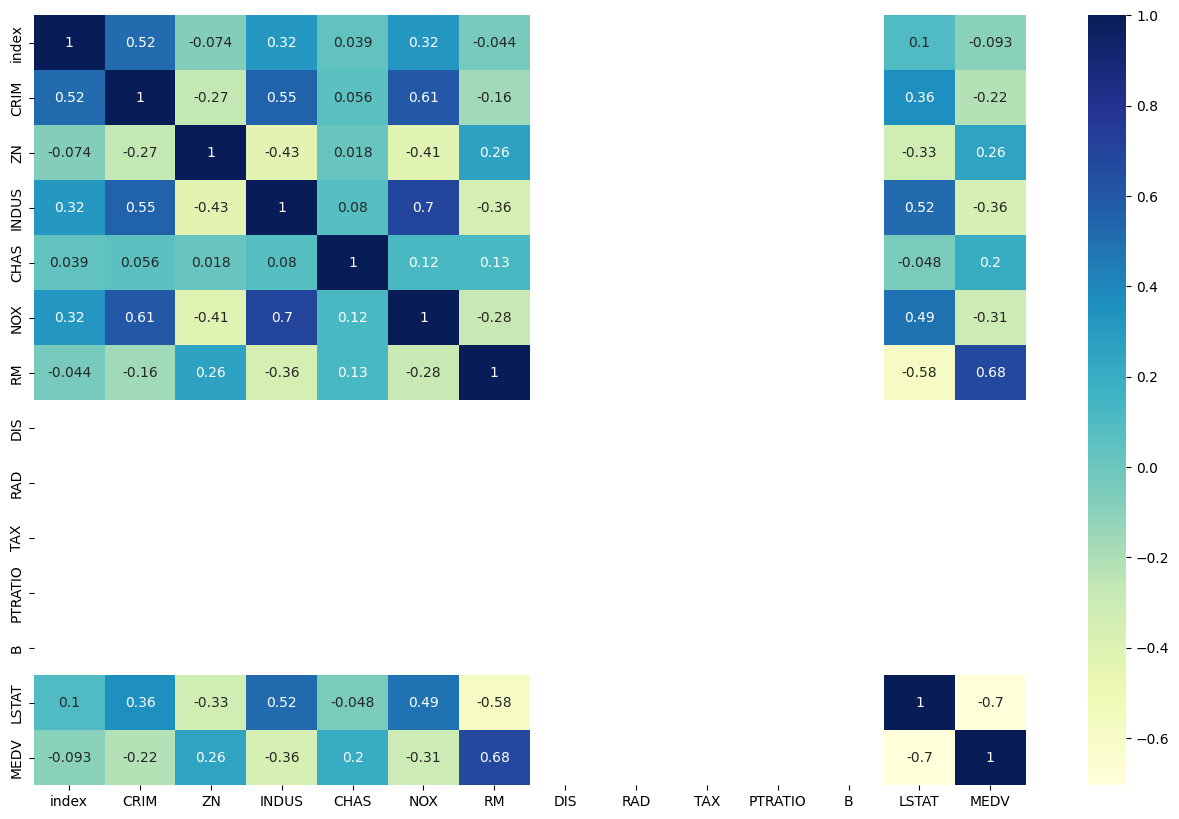

In [319]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [320]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [321]:
features=['ZN','INDUS','CHAS']

In [322]:
x=data[features]

In [323]:
y=data["CRIM"]

In [324]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [325]:
model=LinearRegression()

In [326]:
model.fit(x_train,y_train)

LinearRegression()

In [327]:
y_pred=model.predict(x_test)

In [328]:
mse=mean_squared_error(y_test,y_pred)

In [329]:
r2=r2_score(y_test,y_pred)

In [330]:
print(f'Mean Squared Error:{mse}')
print(f'R-squared:{r2}')

Mean Squared Error:3.788985497781712
R-squared:0.3239746687929337


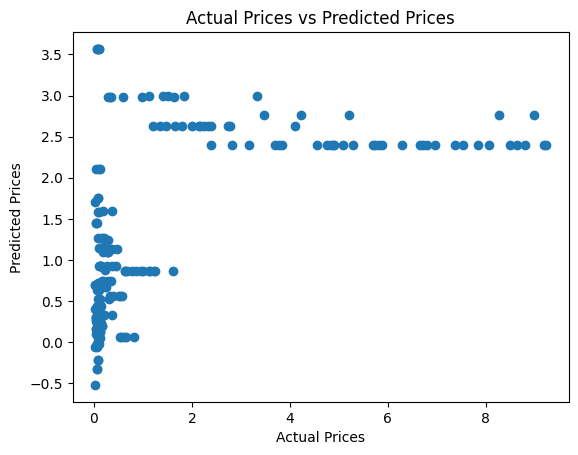

In [331]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [332]:
new_data=pd.DataFrame({'ZN':[2000],'INDUS':[3],'CHAS':[2]})
predicted_price=model.predict(new_data)
print(f'Predicted Price:{predicted_price[0]}')

Predicted Price:-14.943723344421672
